# Exploratory Data Analysis of data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree   import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Random forest
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Dropout, TimeDistributed, Flatten
from keras.optimizers import Adam
import keras
# Cross-validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

## Lecture of information

In [2]:
data_path = "./data"
X = pd.read_csv(f'{data_path}/x_train.csv')
y = pd.read_csv(f'{data_path}/y_train.csv')
x_testing = pd.read_csv(f'{data_path}/x_test.csv')

In [79]:
DF = X.copy()
DF['CLASS'] = y
DF.to_csv('./data/DF.csv', sep=',', index=False)

In [3]:
X = X[X.columns[1:]]
X.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
'Soil_Type_1', 'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10',
'Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20',
'Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']

y = y[y.columns[1:]]
y.columns=['Cover_Type']

# for testing the models
x_testing = x_testing[x_testing.columns[1:]]
x_testing.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
'Soil_Type_1', 'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10',
'Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20',
'Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']


In [4]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,3342,15,13,350,55,2118,208,212,139,1486,...,1,0,0,0,0,0,0,0,0,0
1,2764,39,13,175,43,2648,220,210,122,366,...,0,0,0,0,0,0,0,0,0,0
2,2773,158,5,162,14,2012,226,241,149,967,...,0,0,0,0,0,0,0,0,0,0
3,3083,108,16,30,-14,2639,246,220,98,1909,...,1,0,0,0,0,0,0,0,0,0
4,3096,40,4,201,38,4592,220,231,147,2432,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,3066,133,10,170,30,1455,237,235,128,2624,...,0,0,0,0,0,0,0,0,0,0
406704,2308,37,31,162,38,616,202,156,71,895,...,0,0,0,0,0,0,0,0,0,0
406705,2715,73,32,342,188,1027,237,162,31,953,...,0,0,1,0,0,0,0,0,0,0
406706,3020,179,13,170,19,1471,225,247,152,450,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           406708 non-null  int64
 1   Aspect                              406708 non-null  int64
 2   Slope                               406708 non-null  int64
 3   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 4   Vertical_Distance_To_Hydrology      406708 non-null  int64
 5   Horizontal_Distance_To_Roadways     406708 non-null  int64
 6   Hillshade_9am                       406708 non-null  int64
 7   Hillshade_Noon                      406708 non-null  int64
 8   Hillshade_3pm                       406708 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  406708 non-null  int64
 10  Wilderness_Area_1                   406708 non-null  int64
 11  Wilderness_Area_2                   406708 non-null 

Let's check if is there any missing data

In [54]:
X.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


Conducting EDA to understand our data, lets join our target labeling or classification into the training data to try to find patterns or relationships between the variables.

In [55]:
X["target"] = y
X.groupby('target').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
target,,,,,,,,,,,,,,,,,,,,,
1,148288,148288,148288,148288,148288,148288,148288,148288,148288,148288,...,148288,148288,148288,148288,148288,148288,148288,148288,148288,148288
2,198310,198310,198310,198310,198310,198310,198310,198310,198310,198310,...,198310,198310,198310,198310,198310,198310,198310,198310,198310,198310
3,25028,25028,25028,25028,25028,25028,25028,25028,25028,25028,...,25028,25028,25028,25028,25028,25028,25028,25028,25028,25028
4,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,...,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923
5,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,...,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645
6,12157,12157,12157,12157,12157,12157,12157,12157,12157,12157,...,12157,12157,12157,12157,12157,12157,12157,12157,12157,12157
7,14357,14357,14357,14357,14357,14357,14357,14357,14357,14357,...,14357,14357,14357,14357,14357,14357,14357,14357,14357,14357


<AxesSubplot:xlabel='target', ylabel='count'>

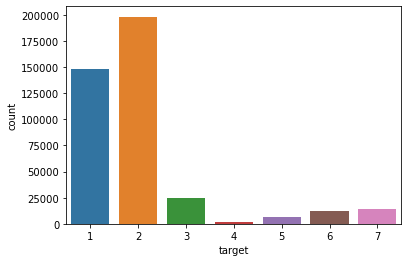

In [56]:
sns.countplot(X['target'])

Data labels are not completely balanced, class 1 and 2 are much more abundant over the dataset

f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(X['Elevation'])
f.add_subplot(1,2,2)
sns.boxplot(X['Elevation'])

f1 = plt.figure(figsize=(20,4))
f1.add_subplot(1,2,1)
sns.distplot(X['Aspect'])
f1.add_subplot(1,2,2)
sns.boxplot(X['Aspect'])


f2 = plt.figure(figsize=(20,4))
f2.add_subplot(1,2,1)
sns.distplot(X['Slope'])
f2.add_subplot(1,2,2)
sns.boxplot(X['Slope'])

f3 = plt.figure(figsize=(20,4))
f3.add_subplot(1,2,1)
sns.distplot(X['Horizontal_Distance_To_Hydrology'])
f3.add_subplot(1,2,2)
sns.boxplot(X['Horizontal_Distance_To_Hydrology'])


f4 = plt.figure(figsize=(20,4))
f4.add_subplot(1,2,1)
sns.distplot(X['Vertical_Distance_To_Hydrology'])
f4.add_subplot(1,2,2)
sns.boxplot(X['Vertical_Distance_To_Hydrology'])


f5 = plt.figure(figsize=(20,4))
f5.add_subplot(1,2,1)
sns.distplot(X['Horizontal_Distance_To_Roadways'])
f5.add_subplot(1,2,2)
sns.boxplot(X['Horizontal_Distance_To_Roadways'])

f6 = plt.figure(figsize=(20,4))
f6.add_subplot(1,2,1)
sns.distplot(X['Hillshade_9am'])
f6.add_subplot(1,2,2)
sns.boxplot(X['Hillshade_9am'])

f7 = plt.figure(figsize=(20,4))
f7.add_subplot(1,2,1)
sns.distplot(X['Hillshade_Noon'])
f7.add_subplot(1,2,2)
sns.boxplot(X['Hillshade_Noon'])

f8 = plt.figure(figsize=(20,4))
f8.add_subplot(1,2,1)
sns.distplot(X['Hillshade_3pm'])
f8.add_subplot(1,2,2)
sns.boxplot(X['Hillshade_3pm'])

f9 = plt.figure(figsize=(20,4))
f9.add_subplot(1,2,1)
sns.distplot(X['Horizontal_Distance_To_Fire_Points'])
f9.add_subplot(1,2,2)
sns.boxplot(X['Horizontal_Distance_To_Fire_Points'])

f10 = plt.figure(figsize=(20,4))
f10.add_subplot(1,2,1)
sns.distplot(X['target'])
f10.add_subplot(1,2,2)
sns.boxplot(X['target'])

#### Compacting soil types. 
We drop the target label again with the aim of transforming data into a more compact way.

In [57]:
X.drop("target",axis="columns",inplace=True)
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [58]:
X["Soil_type"] = 0
x_testing["Soil_type"] = 0
for i,val in enumerate(X):
    if i>=14:  
        print(i,val)      
        X.loc[X[val]==1,val]=i
        x_testing.loc[x_testing[val]==1,val]=i
        X["Soil_type"]  = X["Soil_type"]  + X[val]
        x_testing["Soil_type"]  = x_testing["Soil_type"]  + x_testing[val]

14 Soil_Type_1
15 Soil_Type_2
16 Soil_Type_3
17 Soil_Type_4
18 Soil_Type_5
19 Soil_Type_6
20 Soil_Type_7
21 Soil_Type_8
22 Soil_Type_9
23 Soil_Type_10
24 Soil_Type_11
25 Soil_Type_12
26 Soil_Type_13
27 Soil_Type_14
28 Soil_Type_15
29 Soil_Type_16
30 Soil_Type_17
31 Soil_Type_18
32 Soil_Type_19
33 Soil_Type_20
34 Soil_Type_21
35 Soil_Type_22
36 Soil_Type_23
37 Soil_Type_24
38 Soil_Type_25
39 Soil_Type_26
40 Soil_Type_27
41 Soil_Type_28
42 Soil_Type_29
43 Soil_Type_30
44 Soil_Type_31
45 Soil_Type_32
46 Soil_Type_33
47 Soil_Type_34
48 Soil_Type_35
49 Soil_Type_36
50 Soil_Type_37
51 Soil_Type_38
52 Soil_Type_39
53 Soil_Type_40
54 Soil_type


In [59]:
X["Wilderness_area"] = 0
x_testing["Wilderness_area"] = 0

for i,val in enumerate(X):
    if i>=10:
        if i<14:
            print(i,val)
            X.loc[X[val]==1,val]=i
            x_testing.loc[x_testing[val]==1,val]=i
            X["Wilderness_area"]  = X["Wilderness_area"]  + X[val]
            x_testing["Wilderness_area"]  = x_testing["Wilderness_area"]  + x_testing[val] 

10 Wilderness_Area_1
11 Wilderness_Area_2
12 Wilderness_Area_3
13 Wilderness_Area_4


In [60]:
fields = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', "Wilderness_area","Soil_type"]
X_1 = X[fields]
x_1_testing = x_testing[fields]
X_1.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_area,Soil_type
0,3342,15,13,350,55,2118,208,212,139,1486,12,88
1,2764,39,13,175,43,2648,220,210,122,366,12,46
2,2773,158,5,162,14,2012,226,241,149,967,10,50
3,3083,108,16,30,-14,2639,246,220,98,1909,12,88
4,3096,40,4,201,38,4592,220,231,147,2432,10,84
5,2990,87,12,306,70,1819,238,219,109,1350,12,90
6,3101,43,10,270,61,2901,222,217,129,5676,10,84
7,2894,351,11,872,128,2324,201,222,159,895,12,48
8,3106,158,24,540,29,942,238,236,114,2343,10,84
9,2921,97,12,201,47,4380,240,222,110,3341,10,84


f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(X['Wilderness_area'])
f.add_subplot(1,2,2)
sns.boxplot(X['Wilderness_area'])

f2 = plt.figure(figsize=(20,4))
f2.add_subplot(1,2,1)
sns.distplot(X['Soil_type'])
f2.add_subplot(1,2,2)
sns.boxplot(X['Soil_type'])

X_2 = X_1.copy()
X_2['Horizontal_Distance_To_Hydrology'] = (X_2['Horizontal_Distance_To_Hydrology']-X_2['Horizontal_Distance_To_Hydrology'].min())/(X_2['Horizontal_Distance_To_Hydrology'].max()-X_2['Horizontal_Distance_To_Hydrology'].min())
X_1 = X_2
X_1

In [74]:
print(X_1.shape)
print(x_1_testing.shape)
print(y.shape)

(406708, 12)
(174304, 12)
(406708, 1)


In [62]:
# Store to re-use
X_1.to_csv('./data/X_cleaned.csv', sep='|', index=False)
X_1.to_csv('./data/X_testing.csv', sep='|', index=False)
y.to_csv('./data/y_cleaned.csv',sep='|',index=False)